### Import Prerequisite Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Prepruning

In [7]:
df.drop(['species'] , axis = 1 , inplace = True)

In [8]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [9]:
df.shape

(150, 4)

##### Data Preprocessing

##### 1. Handling Missing Values

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

##### 2. Handling The Outliers

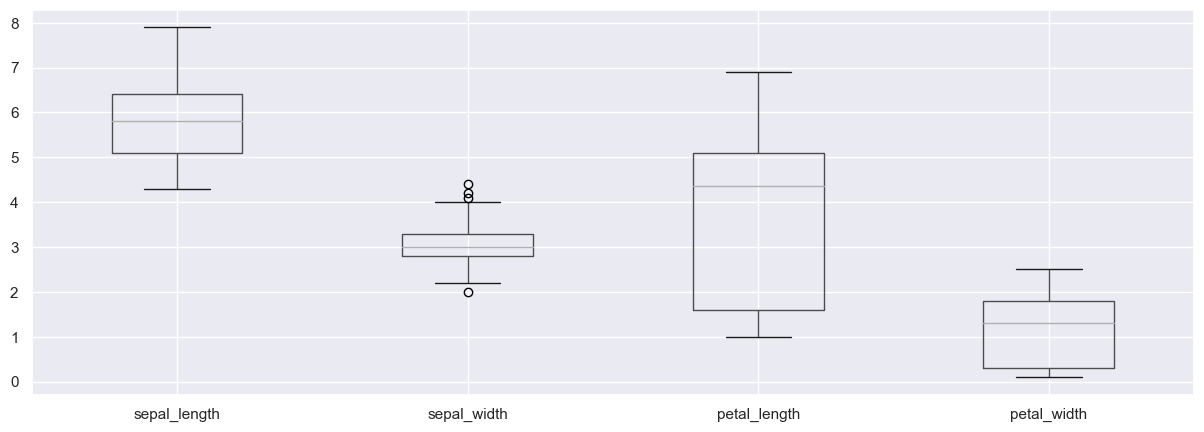

In [11]:
plt.figure(figsize = (15 , 5))
df.boxplot()
plt.show()

##### 3.Feature Scaling

In [12]:
x = df.copy()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
df_scaled = scaler.fit_transform(df)

In [16]:
#df_scaled = pd.DataFrame(df , columns = x.columns)

In [17]:
df_scaled  = pd.DataFrame(df_scaled , columns = x.columns )

In [18]:
df_scaled.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


## Building Clusters on basis of sepal_length  , sepal_width  , petal_length  , petal_width

In [19]:
from sklearn.cluster import KMeans

#### Select K value means How many clsuetrs we will build .

In [20]:
wcss = []
k = []
for i in range(1 , 30):
    
    km = KMeans(n_clusters = i , random_state = 1)
    km.fit(df_scaled)
    wcss.append(km.inertia_)
    k.append(i)

In [21]:
print(wcss)

[600.0, 223.73200573676345, 140.96581663074699, 114.55117670798518, 91.06677122728534, 81.72163411743452, 71.94115919271067, 63.42202913783123, 54.57973369603168, 47.898582118840366, 43.61603237629287, 39.28934742726416, 37.008724976369564, 35.19634059498053, 33.21942369249138, 31.543879115883747, 29.38139398000206, 27.713856016050947, 26.199831836511756, 24.386853147972197, 23.290116523674218, 22.514728282807255, 21.163181021751882, 20.40837438594479, 19.55054426205418, 18.444807099380323, 17.673790719382318, 17.85654823847083, 16.5476844740922]


In [22]:
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### Plot the wcss distance on y axis and calculate the k value of clusters on elbow point

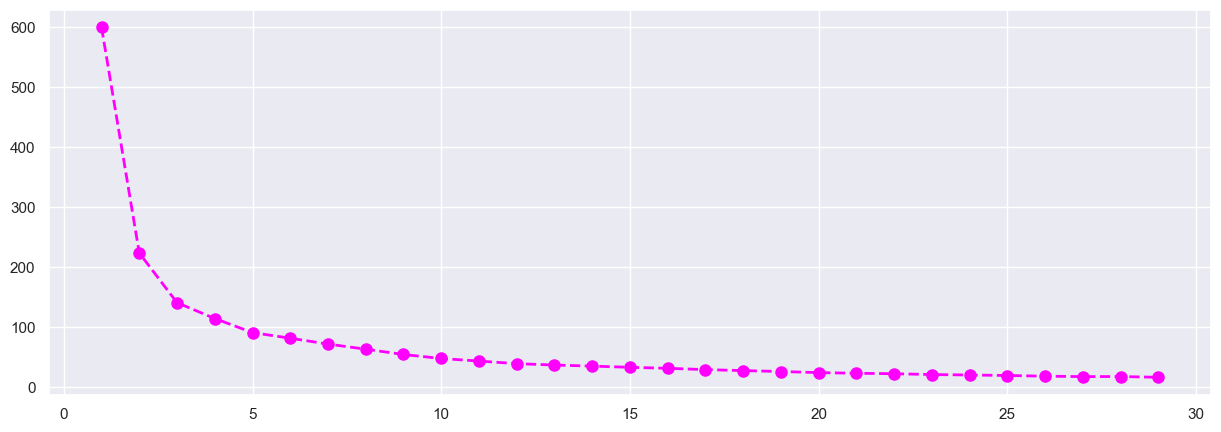

In [23]:
plt.figure(figsize = (15 , 5))
plt.plot(k , wcss , color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.show()

##### K is 3 means we can create three clusters 

#### Now we will build model

In [24]:
kmeans = KMeans(n_clusters = 3 , random_state = 1 )

In [25]:
kmeans

KMeans(n_clusters=3, random_state=1)

In [26]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

##### generating Clusters

In [27]:
label = kmeans.labels_

In [28]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


##### Performance Metrics i.e. Silhouette score

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
score_kmeans =  silhouette_score(df_scaled , label)

In [31]:
score_kmeans

0.4589717867018717

In [32]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [33]:
label = pd.DataFrame(label , columns = ['cluster'])

In [34]:
output_iris = pd.concat([df , label] , axis = 1)

In [35]:
output_iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


##### Visualiise cluster

In [36]:
from matplotlib.colors import ListedColormap

In [37]:
colors = ListedColormap(['magenta' , 'orange' , 'black'])

In [38]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


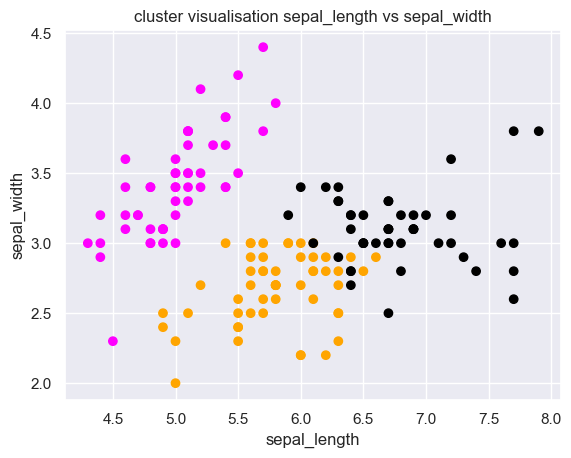

In [39]:
plt.scatter(x = df.iloc[: , 0] ,y =  x.iloc[: , 1] , c = output_iris['cluster'].astype('category')  , cmap = colors)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('cluster visualisation sepal_length vs sepal_width')
plt.show()

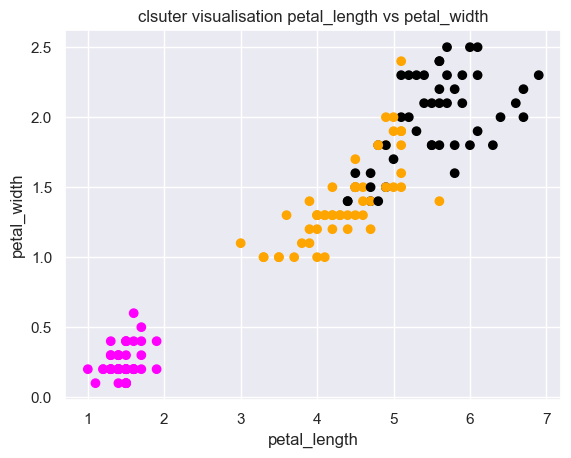

In [40]:
plt.scatter(x.iloc[: , -2] , x.iloc[: , -1] , c = output_iris['cluster'].astype('category') , cmap = colors)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('clsuter visualisation petal_length vs petal_width')
plt.show()

##### calculate centroid

In [41]:
centriod = kmeans.cluster_centers_

In [42]:
centriod

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

In [43]:
centriod = pd.DataFrame(centriod)

###### I just see how centriod looks like .... but actuall y if we have more than two columns then we are not visualize it . so thats why I split into 1 and 2 columns

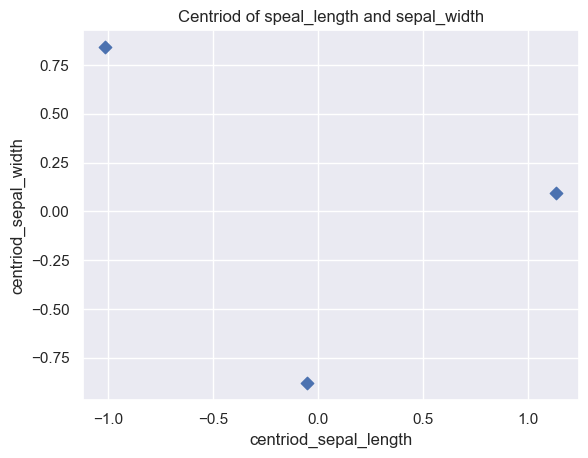

In [44]:
plt.scatter(centriod.iloc[: , 0] , centriod.iloc[: , 1] , s = 40 , marker = 'D')
plt.xlabel('centriod_sepal_length')
plt.ylabel('centriod_sepal_width')
plt.title('Centriod of speal_length and sepal_width')
plt.show()

###### I just see how centriod looks like .... but actuall y if we have more than two columns then we are not visualize it . so thats why I split into 3 and 4 columns

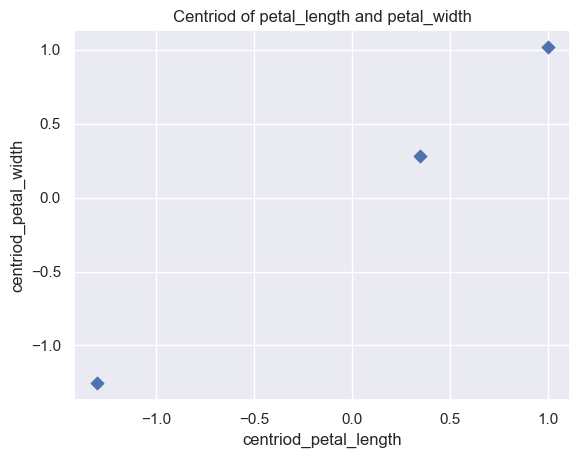

In [45]:
plt.scatter(centriod.iloc[ : , -2] , centriod.iloc[: , -1] , s = 40 , marker = 'D')
plt.xlabel('centriod_petal_length')
plt.ylabel('centriod_petal_width')
plt.title('Centriod of petal_length and petal_width')
plt.show()

## Hierarchical Cluster

In [46]:
from scipy.cluster.hierarchy import dendrogram , linkage

##### fit scaled data in linkgae and pass that linkage data to dendrogram

In [47]:
link_method = linkage(df_scaled)

In [48]:
print(link_method)

[[9.00000000e+00 3.40000000e+01 0.00000000e+00 2.00000000e+00]
 [3.70000000e+01 1.50000000e+02 0.00000000e+00 3.00000000e+00]
 [1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31472970e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.31472970e-01 2.00000000e+00]
 [4.00000000e+01 1.55000000e+02 1.33848276e-01 3.00000000e+00]
 [1.27000000e+02 1.38000000e+02 1.33848276e-01 2.00000000e+00]
 [2.00000000e+00 4.70000000e+01 1.33848276e-01 2.00000000e+00]
 [2.70000000e+01 1.57000000e+02 1.33848276e-01 4.00000000e+00]
 [2.80000000e+01 1.53000000e+02 1.33848276e-01 3.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.43244023e-01 2.00000000e+00]
 [1.90000000e+01 4.60000000e+01 1.43244023e-01 2.00000000e+00]
 [1.00000000e+00 2.50000000e+01 1.66182087e-01 2.00000000e+00]
 [2.90000000e+01 1.59000000e+02 1.66182087e-01 3.000000

##### Draw Dendrogram

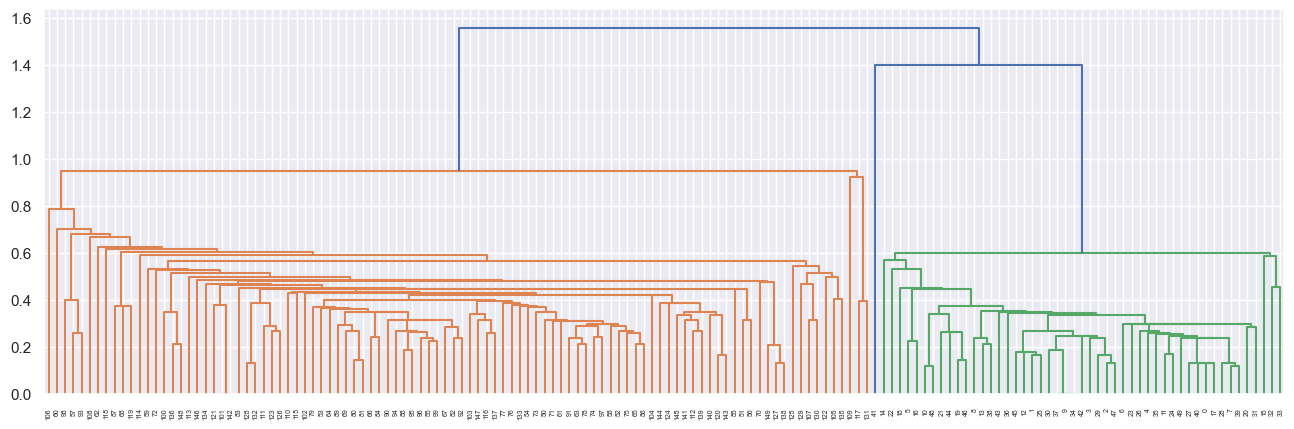

In [49]:
plt.figure(figsize = (16 , 5))
dend = dendrogram(link_method  , p = 10)

##### build hierarchy_cluster

In [50]:
from scipy.cluster.hierarchy import  fcluster

In [51]:
hierarchy_cluster = fcluster(Z = link_method , t = 3 , criterion = 'maxclust')

In [52]:
hierarchy_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [53]:
hierarchy_cluster = pd.DataFrame(hierarchy_cluster , columns = ['hierarchy_cluster'])

In [54]:
hierarchy_cluster.head(2)

,hierarchy_cluster
0,2
1,2


In [55]:
output_iris_hierarchy = pd.concat([df , hierarchy_cluster]  , axis = 1)

In [56]:
output_iris_hierarchy.head(2)

,sepal_length,sepal_width,petal_length,petal_width,hierarchy_cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2


##### Sihouette score by hierarchy 

In [57]:
score_hierarchy = silhouette_score(df_scaled , hierarchy_cluster)

In [58]:
score_hierarchy

0.5028765952374756

In [59]:
print('silhouette score by kmeans is :' , score_kmeans)
print('silhouette score by hierarchy is :' , score_hierarchy)

silhouette score by kmeans is : 0.4589717867018717
silhouette score by hierarchy is : 0.5028765952374756
